In [10]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

%matplotlib inline

In [11]:
from sklearn.linear_model import LinearRegression as LinReg

from sklearn.linear_model import Lasso        # regularizacion L1
from sklearn.linear_model import Ridge        # regularizacion L2
from sklearn.linear_model import ElasticNet   # regularizacion L1+L2


    # se inician los modelos
from sklearn.svm import SVR  # support vector regressor

from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR


    #%pip install xgboost

    #%pip install catboost

    #%pip install lightgbm

from sklearn.ensemble import GradientBoostingRegressor as GBR

from xgboost import XGBRegressor as XGBR

from catboost import CatBoostRegressor as CTR

from lightgbm import LGBMRegressor as LGBMR

In [12]:
muestra = pd.read_csv(r'..\data\muestra.csv',encoding='latin1')
salary_data = pd.read_csv(r'..\data\salaries_data.csv',encoding='latin1')
testeo = pd.read_csv(r'..\data\testeo.csv',encoding='latin1')

In [13]:
muestra.head()

,id,salary_in_usd
0,0,70377
1,1,85839
2,2,63613
3,3,88561
4,4,37621


In [14]:
salary_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


In [15]:
testeo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,87000,USD,US,100,US,L
2,2020,MI,FT,Data Analyst,85000,USD,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,299000,CNY,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,450000,INR,IN,100,IN,L


In [16]:
salary_data.drop(['salary'], axis=1, inplace = True)

In [17]:
testeo.drop(['salary'], axis=1, inplace = True)

In [18]:
# unimosss


p1 = pd.concat([salary_data, testeo])

salary_data.shape, testeo.shape, p1.shape

((500, 10), (107, 9), (607, 10))

In [19]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 106
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary_currency     607 non-null    object 
 5   salary_in_usd       500 non-null    float64
 6   employee_residence  607 non-null    object 
 7   remote_ratio        607 non-null    int64  
 8   company_location    607 non-null    object 
 9   company_size        607 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 52.2+ KB


In [20]:
p1.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [21]:
p1.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [22]:
p1.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [23]:
p1.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Data Analytics Manager                        7
Principal Data Scientist                      7
Data Science Consultant                       7
Computer Vision Engineer                      6
Lead Data Engineer                            6
BI Data Analyst                               6
ML Engineer                                   6
Data Engineering Manager                      5
Business Data Analyst                         5
Applied Data Scientist                  

In [24]:
p1.employee_residence.value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
BR      6
PT      6
PK      6
NL      5
PL      4
IT      4
RU      4
AU      3
AE      3
VN      3
AT      3
TR      3
SG      2
HU      2
DK      2
RO      2
NG      2
MX      2
SI      2
BE      2
IE      1
AR      1
CO      1
IQ      1
HR      1
PH      1
CN      1
MD      1
LU      1
MT      1
BO      1
MY      1
HN      1
UA      1
NZ      1
RS      1
IR      1
DZ      1
KE      1
CH      1
PR      1
CL      1
CZ      1
EE      1
HK      1
BG      1
JE      1
TN      1
Name: employee_residence, dtype: int64

In [25]:
p1.company_location.value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
PT      4
AT      4
PL      4
NL      4
PK      3
DK      3
AU      3
BR      3
AE      3
TR      3
LU      3
MX      3
CH      2
IT      2
CZ      2
RU      2
BE      2
SI      2
NG      2
CN      2
MT      1
HN      1
IL      1
RO      1
SG      1
CO      1
IQ      1
HR      1
NZ      1
HU      1
IR      1
DZ      1
EE      1
UA      1
CL      1
KE      1
VN      1
IE      1
AS      1
MD      1
MY      1
Name: company_location, dtype: int64

In [26]:
p1.company_size.value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder



In [28]:
for column in p1.columns:
    if p1[column].dtype == 'object':
        p1[column]=LabelEncoder().fit_transform(p1[column])
        
p1.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,3,2,17,16,140250.0,55,100,48,1
1,2022,3,2,17,16,135000.0,55,100,48,1
2,2021,2,2,5,16,100000.0,55,100,48,1
3,2021,2,0,36,16,270000.0,55,100,48,0
4,2021,2,2,17,7,26005.0,47,0,48,0


In [29]:
data1 = p1.head(500)

In [30]:
y_1 = p1.tail(107).drop(['salary_in_usd','salary_currency'], axis=1)

In [31]:
X = data1.drop(['salary_currency','salary_in_usd'], axis=1)

y = data1.salary_in_usd

In [32]:
from sklearn.model_selection import train_test_split as tts

# Your code here:

# train-test-split


X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 8), (100, 8), (400,), (100,))

In [33]:
from funciones import *

In [34]:
entreno1 = coach_models(X_train, y_train, X_test,  y_test)
entreno1

,modelo,rmse,mae,r2
0,linreg,44949.855926,35843.982507,0.365358
1,lasso,44949.977404,35843.710828,0.365354
2,ridge,44956.663267,35836.718187,0.365165
3,elastic,46199.252062,36222.897132,0.329587
4,svr,56432.620505,44886.687500,-0.000306
5,rfr,34860.737631,26930.047602,0.618279
6,etr,62690.201868,36167.879687,-0.234445
7,gbr,38334.470461,28238.702540,0.538415
8,xgbr,46154.793604,31532.197334,0.330877
9,ctr,39144.305668,29716.757096,0.518707


In [35]:
m = RFR()

m.fit(X, y)
m.predict(y_1)
y_pred=m.predict(y_1)


In [36]:
muestra.salary_in_usd = y_pred
muestra.head()

,id,salary_in_usd
0,0,113554.155000
1,1,220790.166667
2,2,116762.000000
3,3,82454.474000
4,4,42336.140000


In [37]:
muestra.to_csv(r'../subidas/entreno1RFR.csv', index=False)

In [38]:
m = GBR()

m.fit(X, y)
m.predict(y_1)
y_pred=m.predict(y_1)


In [39]:
muestra.salary_in_usd = y_pred
muestra.head()

,id,salary_in_usd
0,0,109059.224925
1,1,186177.796135
2,2,119065.632883
3,3,90202.404526
4,4,51388.852066


In [40]:
muestra.to_csv(r'../subidas/entreno1GBR.csv', index=False)

In [41]:
# unimosss

p2 = pd.concat([salary_data, testeo])

salary_data.shape, testeo.shape, p2.shape

((500, 10), (107, 9), (607, 10))

In [42]:
p2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 106
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary_currency     607 non-null    object 
 5   salary_in_usd       500 non-null    float64
 6   employee_residence  607 non-null    object 
 7   remote_ratio        607 non-null    int64  
 8   company_location    607 non-null    object 
 9   company_size        607 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 52.2+ KB


In [43]:
p2.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [44]:
p2.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [45]:
x1 = p2[['job_title','salary_in_usd']].groupby('job_title').agg({'salary_in_usd': ['mean', 'std', 'count']}).sort_values(by=[('salary_in_usd', 'mean')])

x1

salary_in_usd                     
                                                   mean            std count
job_title                                                                   
3D Computer Vision Researcher               5409.000000            NaN     1
Product Data Analyst                       20000.000000            NaN     1
Computer Vision Engineer                   28226.750000   21958.119127     4
Data Analytics Engineer                    35000.000000   21213.203436     2
Machine Learning Infrastructure Engineer   54217.500000    5709.887258     2
ETL Developer                              54957.000000       0.000000     2
Big Data Engineer                          57080.571429   43694.897848     7
AI Scientist                               59410.600000   80608.333699     5
Finance Data Analyst                       61896.000000            NaN     1
Data Science Consultant                    67874.200000   37698.611283     5
Computer Vision Software Engineer          70000.000000            NaN     1
Machine Learning Developer                 78791.000000       0.000000     2
Head of Machine Learning                   79039.000000            NaN     1
BI Data Analyst                            82454.400000   52965.388668     5
Data Science Engineer                      83705.000000   61540.917380     2
Lead Machine Learning Engineer             87932.000000            NaN     1
Marketing Data Analyst                     88654.000000            NaN     1
Business Data Analyst                      91253.500000   33851.406170     4
Data Analyst                               92154.555556   40227.368794    81
Lead Data Analyst                          94804.500000  106342.495929     2
Big Data Architect                         99703.000000            NaN     1
Research Scientist                         99953.583333  111574.041252    12
Staff Data Scientist                      105000.000000            NaN     1
Data Scientist                            110782.446281   64563.064035   121
Data Engineer                             111636.207207   57929.204587   111
Lead Data Scientist                       115190.000000   74715.181188     3
Machine Learning Manager                  117104.000000            NaN     1
ML Engineer                               117504.000000  115217.451253     6
Machine Learning Engineer                 117583.129032   62932.517493    31
Data Engineering Manager                  123227.200000   50374.695033     5
Cloud Data Engineer                       124647.000000   49996.692071     2
Data Analytics Manager                    127134.285714   17853.383299     7
Lead Data Engineer                        139724.500000   74845.891227     6
Head of Data                              142703.250000   92071.121703     4
Machine Learning Scientist                143900.000000   73557.030029     7
Director of Data Engineering              156738.000000   61181.707135     2
Data Science Manager                      158328.500000   52589.180497    12
Analytics Engineer                        164900.000000   26344.449131     3
Data Specialist                           165000.000000            NaN     1
Head of Data Science                      167000.000000   80610.173055     2
Principal Data Analyst                    170000.000000            NaN     1
Applied Data Scientist                    175655.000000  123647.186470     5
Data Architect                            175934.250000   51814.425917     8
Applied Machine Learning Scientist        178800.000000  212273.691257     3
Director of Data Science                  195074.000000   70015.787970     7
Principal Data Scientist                  214449.500000  103718.714550     6
Data Analytics Lead                       405000.000000            NaN     1
Financial Data Analyst                    450000.000000            NaN     1
NLP Engineer                                        NaN            NaN     0
Principal Data Engineer               

In [46]:
job ={'Data Scientist':15, 
      'Data Engineer':14, 
      'Data Analyst':13,
      'Machine Learning Engineer':12,
      'Research Scientist':11,
       'Data Science Manager':10,
      'Data Architect':9,
      'Big Data Engineer':8,
       'Machine Learning Scientist':7,
      'Director of Data Science':6,
       'AI Scientist':1, 
      'Data Analytics Manager':1,
      'Principal Data Scientist':1,
       'Data Science Consultant':1,
      'Computer Vision Engineer':1,
       'Lead Data Engineer':1,
      'BI Data Analyst':1,
      'ML Engineer':12,
       'Data Engineering Manager':1,
      'Business Data Analyst': 13,
       'Applied Data Scientist':1,
      'Head of Data':1,
      'Head of Data Science':1,
       'Applied Machine Learning Scientist':1,
      'Analytics Engineer':1,
       'Data Analytics Engineer':1,
      'Machine Learning Infrastructure Engineer':1,
       'Lead Data Analyst':1,
      'Data Science Engineer':1,
       'Computer Vision Software Engineer':1, 
      'Lead Data Scientist':1,
       'Principal Data Engineer':1,
      'Machine Learning Developer':1,
       'Principal Data Analyst':6,
      'ETL Developer':1,
      'Financial Data Analyst':1,
       'Cloud Data Engineer':1,
      'Product Data Analyst':1,
       'Director of Data Engineering':1,
      'Staff Data Scientist':15,
       'Head of Machine Learning':1,
      'Finance Data Analyst': 5,
       'Marketing Data Analyst':1,
      'Data Analytics Lead': 5,
      'Big Data Architect':1,
       'Lead Machine Learning Engineer':1,
      'Data Specialist':1,
       '3D Computer Vision Researcher':1,
      'Machine Learning Manager':12,
       'NLP Engineer':1
     }

In [47]:
p2.job_title =p2.job_title.apply(lambda x: job[x])

In [48]:
p2.job_title.value_counts()

15    144
14    132
1     115
13    102
12     48
11     16
10     12
9      11
6       9
7       8
8       8
5       2
Name: job_title, dtype: int64

In [49]:
p1.company_location.value_counts()

x2 = p2[['company_location','salary_in_usd']].groupby('company_location').agg({'salary_in_usd': ['mean', 'std', 'count'],'company_location': 'count'}).sort_values(by=[('salary_in_usd', 'mean')])

x2

salary_in_usd                     company_location
                           mean           std count            count
company_location                                                    
MX                  2859.000000           NaN     1                3
VN                  4000.000000           NaN     1                1
IR                  4000.000000           NaN     1                1
KE                  9272.000000           NaN     1                1
PK                 13333.333333   6110.100927     3                3
UA                 13400.000000           NaN     1                1
MD                 18000.000000           NaN     1                1
AS                 18053.000000           NaN     1                1
HN                 20000.000000           NaN     1                1
TR                 20096.666667   7956.760417     3                3
BR                 21453.500000   3601.294837     2                3
MT                 28369.000000           NaN     1                1
NG                 30000.000000  28284.271247     2                2
IN                 31242.368421  24573.893510    19               24
EE                 32974.000000           NaN     1                1
HU                 35735.000000           NaN     1                1
CL                 40038.000000           NaN     1                1
LU                 43942.666667  29451.006932     3                3
PT                 47793.750000  17789.253373     4                4
ES                 51970.000000  22314.458965    12               14
GR                 52576.300000  20354.374523    10               11
NL                 54945.750000  13381.031235     4                4
RO                 60000.000000           NaN     1                1
SI                 63831.000000  55165.642641     2                2
CH                 64114.000000  82352.484164     2                2
FR                 64764.750000  29954.090099    12               15
CZ                 69999.000000           NaN     1                2
IE                 71444.000000           NaN     1                1
PL                 76246.666667  67657.399228     3                4
AT                 76738.666667  13386.018539     3                4
GB                 78379.731707  25691.581764    41               47
DE                 85303.304348  41356.889929    23               28
BE                 85699.000000   4179.001077     2                2
AU                 87064.000000    510.531096     2                3
JP                 87691.000000  55519.986834     4                6
DK                 88654.000000           NaN     1                3
SG                 89294.000000           NaN     1                1
DZ                100000.000000           NaN     1                1
CN                100000.000000           NaN     1                2
AE                100000.000000  30413.812651     3                3
CA                101037.360000  45861.580151    25               30
NZ                125000.000000           NaN     1                1
US                144892.682432  67918.037174   296              355
CO                          NaN           NaN     0                1
HR                          NaN           NaN     0                1
IL                          NaN           NaN     0                1
IQ                          NaN           NaN     0                1
IT                          NaN           NaN     0                2
MY                          NaN           NaN     0                1
RU                          NaN           NaN     0                2

In [50]:
pais = {'US':15,
        'GB':14,
        'CA':13,
        'DE':12,
        'IN':11,
        'FR':10,
        'ES':9,
        'GR':8,
        'JP':7,
        'PT':5,
        'AT':6,
        'PL':6,
       'NL':1,
        'PK':1,
        'DK':1,
        'AU':5,
        'BR':1,
        'AE':1,
        'TR':1,
        'LU':1,
        'MX':1,
        'CH':1,
        'IT':1, 
        'CZ':1,
       'RU':1,
        'BE':1,
        'SI':1,
        'NG':1,
        'CN':1,
        'MT':1,
        'HN':1,
        'IL':1, 
        'RO':1,
        'SG':1,
        'CO':1,
        'IQ':1,
       'HR':1,
        'NZ':1,
        'HU':1,
        'IR':1,
        'DZ':1,
        'EE':1,
        'UA':1,
        'CL':1,
        'KE':1,
        'VN':1,
        'IE':1,
        'AS':1,
       'MD':1,
        'MY':1
       }

In [51]:
p2.company_location = p2.company_location.apply(lambda x: pais[x])

In [52]:
p2.company_location.value_counts()

15    355
1      62
14     47
13     30
12     28
11     24
10     15
9      14
8      11
6       8
5       7
7       6
Name: company_location, dtype: int64

In [53]:
salary_data.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,EUR,26005,RO,0,US,L


In [54]:
p2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 106
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    int64  
 4   salary_currency     607 non-null    object 
 5   salary_in_usd       500 non-null    float64
 6   employee_residence  607 non-null    object 
 7   remote_ratio        607 non-null    int64  
 8   company_location    607 non-null    int64  
 9   company_size        607 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 52.2+ KB


In [55]:
for column in p2.columns:
    if p2[column].dtype == 'object':
        p2[column]=LabelEncoder().fit_transform(p2[column])
        
p2.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,3,2,14,16,140250.0,55,100,15,1
1,2022,3,2,14,16,135000.0,55,100,15,1
2,2021,2,2,1,16,100000.0,55,100,15,1
3,2021,2,0,12,16,270000.0,55,100,15,0
4,2021,2,2,14,7,26005.0,47,0,15,0


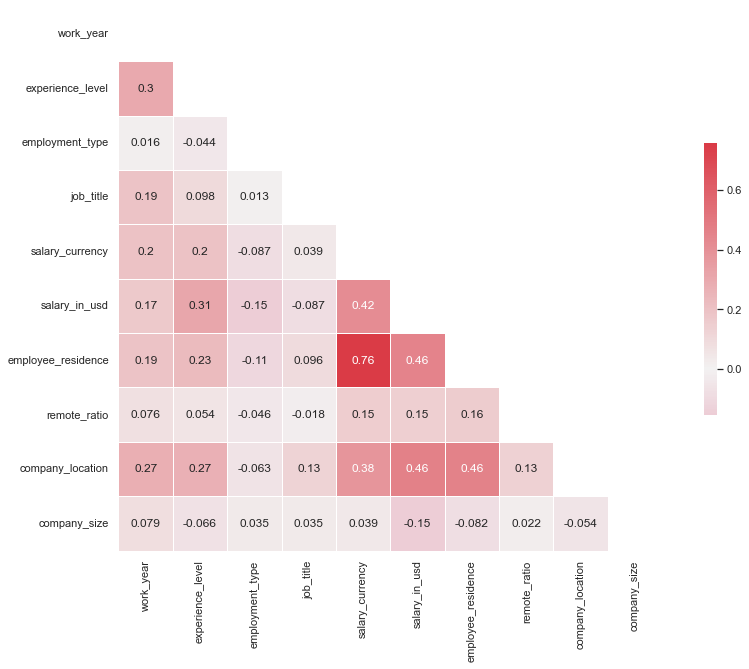

In [56]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(p2.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(p2.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [57]:
data2 = p2.head(500)

In [58]:
y_2 = p2.tail(107).drop(['salary_currency', 'salary_in_usd'], axis=1)

In [59]:
X = data2.drop(['salary_currency','salary_in_usd'], axis=1)

y = data2.salary_in_usd

In [60]:
from sklearn.model_selection import train_test_split as tts

# Your code here:

# train-test-split


X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 8), (100, 8), (400,), (100,))

In [61]:
entreno_2 = coach_models(X_train, y_train, X_test,  y_test)
entreno_2

,modelo,rmse,mae,r2
0,linreg,46901.523665,37323.495633,0.309050
1,lasso,46901.162989,37322.948269,0.309061
2,ridge,46888.522684,37302.317389,0.309433
3,elastic,47808.775190,38064.166519,0.282061
4,svr,56432.633094,44886.698965,-0.000306
5,rfr,42420.237169,30014.362331,0.434779
6,etr,52405.077365,37154.823020,0.137381
7,gbr,39395.342308,28814.813941,0.512514
8,xgbr,49694.322880,36334.977080,0.224314
9,ctr,44363.271144,31113.573960,0.381813


In [62]:
m = RFR()

m.fit(X, y)
m.predict(y_2)
y_pred=m.predict(y_2)


In [63]:
muestra.salary_in_usd = y_pred
muestra.head()

,id,salary_in_usd
0,0,122064.162500
1,1,167924.666667
2,2,125301.666667
3,3,73263.520000
4,4,41461.200000


In [64]:
muestra.to_csv(r'../subidas/entreno2RFR_b.csv', index=False)

In [65]:
m = GBR()

m.fit(X, y)
m.predict(y_1)
y_pred=m.predict(y_1)


In [66]:
muestra.salary_in_usd = y_pred
muestra.head()

,id,salary_in_usd
0,0,193514.216091
1,1,141185.957225
2,2,181944.632702
3,3,62579.818681
4,4,64156.581511


In [67]:
muestra.to_csv(r'../subidas/entreno2GBR_b.csv', index=False)

In [68]:

salary_data.drop_duplicates().shape == salary_data.shape

False

In [69]:
x = list(salary_data.duplicated()[salary_data.duplicated() == True].index)

In [70]:
salary_data.iloc[x].head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
41,2022,SE,FT,Data Scientist,USD,140000,US,100,US,M
133,2022,SE,FT,Data Scientist,USD,140000,US,100,US,M
143,2022,SE,FT,Data Analyst,USD,90320,US,100,US,M
153,2022,SE,FT,Data Analyst,USD,61300,CA,100,CA,M
165,2022,SE,FT,Data Scientist,USD,140000,US,100,US,M


In [71]:


p3 = pd.concat([salary_data.drop_duplicates(), testeo])

salary_data.drop_duplicates().shape, testeo.shape, p3.shape

((466, 10), (107, 9), (573, 10))

In [72]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder



In [73]:
for column in p3.columns:
    if p3[column].dtype == 'object':
        p3[column]=LabelEncoder().fit_transform(p3[column])
        
p3.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,3,2,17,16,140250.0,55,100,48,1
1,2022,3,2,17,16,135000.0,55,100,48,1
2,2021,2,2,5,16,100000.0,55,100,48,1
3,2021,2,0,36,16,270000.0,55,100,48,0
4,2021,2,2,17,7,26005.0,47,0,48,0


In [74]:
data3 = p3.head(466)

In [75]:
y_3 = p3.tail(107).drop(['salary_in_usd','salary_currency'], axis=1)

In [76]:
X = data3.drop(['salary_currency','salary_in_usd'], axis=1)

y = data3.salary_in_usd

In [77]:


# Your code here:

# train-test-split


X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((372, 8), (94, 8), (372,), (94,))

In [78]:
entreno3 = coach_models(X_train, y_train, X_test,  y_test)
entreno3

,modelo,rmse,mae,r2
0,linreg,58396.862115,40386.453478,0.313563
1,lasso,58397.292280,40386.721965,0.313553
2,ridge,58415.193354,40397.752466,0.313132
3,elastic,59404.605177,41469.339836,0.289667
4,svr,74563.676236,54912.436028,-0.119120
5,rfr,53021.488057,37514.785880,0.434118
6,etr,72099.054355,48548.158156,-0.046360
7,gbr,51032.362373,33366.967256,0.475780
8,xgbr,56829.753307,38464.538455,0.349910
9,ctr,55050.932172,36786.149818,0.389970


In [79]:
# unimosss


p4 = pd.concat([salary_data, testeo])

salary_data.shape, testeo.shape, p1.shape

((500, 10), (107, 9), (607, 10))

In [80]:
p4.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [81]:
p4.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [82]:
p4.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [83]:
p4.company_size.value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [84]:
p4 = pd.get_dummies(p4, columns=['company_size'], drop_first=True)

In [85]:
p4 = pd.get_dummies(p4, columns=['employment_type'], drop_first=True)

In [86]:
p4 = pd.get_dummies(p4, columns=['experience_level'], drop_first=True)

In [87]:
p4.head()

,work_year,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size_M,company_size_S,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EX,experience_level_MI,experience_level_SE
0,2022,Data Engineer,USD,140250.0,US,100,US,1,0,0,1,0,0,0,1
1,2022,Data Engineer,USD,135000.0,US,100,US,1,0,0,1,0,0,0,1
2,2021,BI Data Analyst,USD,100000.0,US,100,US,1,0,0,1,0,0,1,0
3,2021,ML Engineer,USD,270000.0,US,100,US,0,0,0,0,0,0,1,0
4,2021,Data Engineer,EUR,26005.0,RO,0,US,0,0,0,1,0,0,1,0


In [88]:
for column in p4.columns:
    if p4[column].dtype == 'object':
        p4[column]=LabelEncoder().fit_transform(p4[column])
        
p4.head()

,work_year,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size_M,company_size_S,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EX,experience_level_MI,experience_level_SE
0,2022,17,16,140250.0,55,100,48,1,0,0,1,0,0,0,1
1,2022,17,16,135000.0,55,100,48,1,0,0,1,0,0,0,1
2,2021,5,16,100000.0,55,100,48,1,0,0,1,0,0,1,0
3,2021,36,16,270000.0,55,100,48,0,0,0,0,0,0,1,0
4,2021,17,7,26005.0,47,0,48,0,0,0,1,0,0,1,0


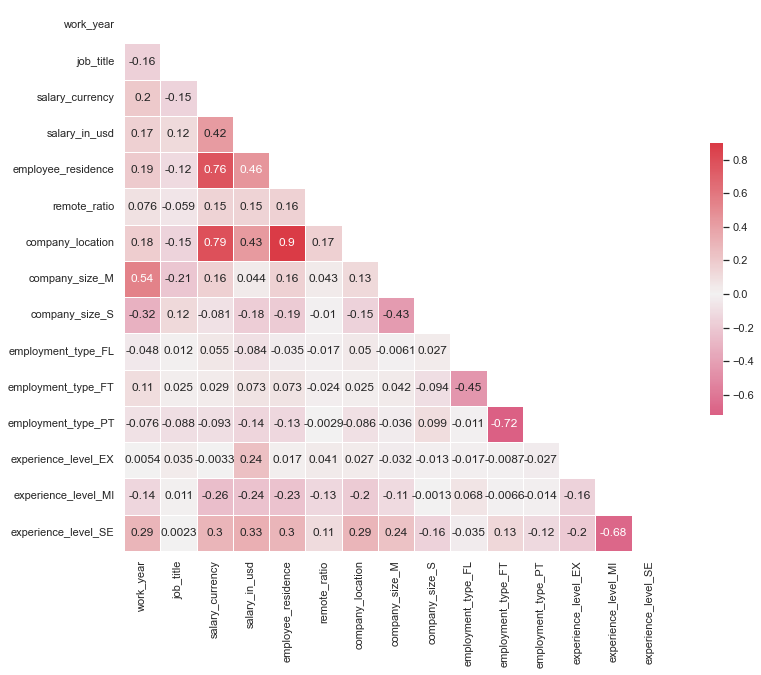

In [89]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(p4.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(p4.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [90]:
data4 = p4.head(500)

In [91]:
y_4 = p4.tail(107).drop(['salary_in_usd','salary_currency', 'company_location'], axis=1)

In [92]:
X = data4.drop(['salary_currency','salary_in_usd',  'company_location'], axis=1)

y = data4.salary_in_usd

In [93]:

# Your code here:

# train-test-split


X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 12), (100, 12), (400,), (100,))

In [94]:
entreno4 = coach_models(X_train, y_train, X_test,  y_test)
entreno4

,modelo,rmse,mae,r2
0,linreg,41566.842322,32946.724699,0.457292
1,lasso,41568.446165,32947.812402,0.457250
2,ridge,42259.234110,33108.855689,0.439061
3,elastic,48225.157034,38257.075496,0.269501
4,svr,56432.635341,44886.700692,-0.000307
5,rfr,35756.829378,27283.458258,0.598403
6,etr,41769.689672,31921.136354,0.451982
7,gbr,35443.224892,27563.879481,0.605417
8,xgbr,52293.630007,35351.465312,0.141046
9,ctr,36856.449806,28469.248046,0.573323


In [95]:
m = RFR()

m.fit(X, y)
m.predict(y_4)
y_pred=m.predict(y_4)


In [96]:
muestra.salary_in_usd = y_pred
muestra.head()

,id,salary_in_usd
0,0,115892.460
1,1,214238.375
2,2,114938.000
3,3,85196.644
4,4,39972.175


In [97]:
muestra.to_csv(r'../subidas/entreno4RFR.csv', index=False)

In [98]:
m = GBR()

m.fit(X, y)
m.predict(y_4)
y_pred=m.predict(y_4)


In [99]:
muestra.salary_in_usd = y_pred
muestra.head()

,id,salary_in_usd
0,0,96839.139606
1,1,187288.336029
2,2,108660.850409
3,3,81235.715587
4,4,35563.973479


In [100]:
muestra.to_csv(r'../subidas/entreno4GBR.csv', index=False)

In [101]:
data1 = p1.head(500)

In [102]:
y_1b = p1.tail(107).drop(['salary_in_usd','salary_currency', 'company_location'], axis=1)

In [103]:
X = data1.drop(['salary_currency','salary_in_usd', 'company_location'], axis=1)

y = data1.salary_in_usd

In [104]:
from sklearn.model_selection import train_test_split as tts

# Your code here:

# train-test-split


X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [105]:
entreno1b = coach_models(X_train, y_train, X_test,  y_test)
entreno1b

,modelo,rmse,mae,r2
0,linreg,45192.954030,36169.315751,0.358475
1,lasso,45193.099405,36169.192744,0.358470
2,ridge,45202.009747,36167.441962,0.358217
3,elastic,46506.472621,36525.614856,0.320641
4,svr,56432.633335,44886.699104,-0.000306
5,rfr,34139.797956,26132.253527,0.633905
6,etr,68996.951505,41413.923020,-0.495314
7,gbr,34526.960874,26720.782350,0.625554
8,xgbr,44604.064290,32181.141699,0.375084
9,ctr,35175.844207,27775.535769,0.611347


In [106]:
m = RFR()

m.fit(X, y)
m.predict(y_1b)
y_pred=m.predict(y_1b)


In [107]:
muestra.salary_in_usd = y_pred
muestra.head()

,id,salary_in_usd
0,0,111430.236667
1,1,214801.100000
2,2,120219.333333
3,3,86155.380000
4,4,44438.190000


In [108]:
muestra.to_csv(r'../subidas/entreno1bRFR.csv', index=False)

In [109]:
m = GBR()

m.fit(X, y)
m.predict(y_1b)
y_pred=m.predict(y_1b)


In [110]:
muestra.salary_in_usd = y_pred
muestra.head()

,id,salary_in_usd
0,0,111381.727704
1,1,192973.597305
2,2,118899.555047
3,3,88428.005743
4,4,45543.852037


In [111]:
muestra.to_csv(r'../subidas/entreno1bGBR.csv', index=False)

In [112]:
data1 = p1.head(500)

In [113]:
y_1 = p1.tail(107).drop(['salary_in_usd','salary_currency'], axis=1)

In [114]:
X = data1.drop(['salary_currency','salary_in_usd'], axis=1)

y = data1.salary_in_usd

In [115]:
from sklearn.model_selection import train_test_split as tts

# Your code here:

# train-test-split


X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 8), (100, 8), (400,), (100,))

In [116]:
entreno1b = coach_models(X_train, y_train, X_test,  y_test)
entreno1b

,modelo,rmse,mae,r2
0,linreg,44949.855926,35843.982507,0.365358
1,lasso,44949.977404,35843.710828,0.365354
2,ridge,44956.663267,35836.718187,0.365165
3,elastic,46199.252062,36222.897132,0.329587
4,svr,56432.620505,44886.687500,-0.000306
5,rfr,35486.570460,27550.826340,0.604451
6,etr,52271.723684,36802.421354,0.141765
7,gbr,38076.043604,28446.478615,0.544618
8,xgbr,46154.793604,31532.197334,0.330877
9,ctr,39144.305668,29716.757096,0.518707


In [117]:
from sklearn.model_selection import GridSearchCV

def grid(modelo, param):
    
    g=GridSearchCV(modelo, # modelo de sklearn
                   param,  # dictio de parametros
                   cv=5,   # nº de cortes del cross-validation
                   return_train_score=True, # error en entrenamiento para checkear
                   n_jobs=-1  # usa todos los nucleos disponibles
                  )

    g.fit(X_train, y_train)

    print('Acierto test: {:.2f}'.format(g.score(X_test, y_test)))
    print('Acierto train: {:.2f}'.format(g.score(X_train, y_train)))
    print('Mejores parametros: {}'.format(g.best_params_))
    print('Mejor acierto cv: {:.2f}'.format(g.best_score_))

    return g.best_estimator_.fit(X_train, y_train)

In [118]:
param={'n_estimators': [5, 8, 10, 50, 100, 150, 200, 500],
       'max_depth': [1, 3, 5, 8, 10, 15, 20]}

In [119]:
rfr_p=RFR()

rfr_p.fit(X_train, y_train)

train_score=rfr_p.score(X_train, y_train)    # R2
test_score=rfr_p.score(X_test, y_test)

print (train_score, test_score)

0.829834872325693 0.6035223574127034


In [120]:

%%time

grid(rfr_p, param)

Acierto test: 0.51
Acierto train: 0.66
Mejores parametros: {'max_depth': 5, 'n_estimators': 5}
Mejor acierto cv: 0.42
CPU times: total: 1.05 s
Wall time: 17.3 s


RandomForestRegressor(max_depth=5, n_estimators=5)

In [121]:
modelo=grid(rfr_p, param)

Acierto test: 0.62
Acierto train: 0.68
Mejores parametros: {'max_depth': 5, 'n_estimators': 50}
Mejor acierto cv: 0.39


In [122]:
modelo.predict(y_1)
y_pred=modelo.predict(y_1)

In [123]:
muestra.salary_in_usd = y_pred
muestra.head()

,id,salary_in_usd
0,0,59864.014041
1,1,215046.794576
2,2,113443.578100
3,3,89111.748726
4,4,50179.441163


In [124]:
muestra.to_csv(r'../subidas/entreno1RFR_optimi.csv', index=False)

In [128]:
entreno1b['entreno'] = '1b'

In [132]:
entreno1b.sort_values(by=['rmse']).head(3)

,modelo,rmse,mae,r2,entreno
5,rfr,35486.570460,27550.826340,0.604451,1b
10,lgbmr,36215.880913,28185.185072,0.588025,1b
7,gbr,38076.043604,28446.478615,0.544618,1b


In [133]:
entreno1['entreno'] = '1'
entreno1.sort_values(by=['rmse']).head(3)

,modelo,rmse,mae,r2,entreno
5,rfr,34860.737631,26930.047602,0.618279,1
10,lgbmr,36215.880913,28185.185072,0.588025,1
7,gbr,38334.470461,28238.702540,0.538415,1


In [136]:
entreno_2['entreno'] = '2'
entreno_2.sort_values(by=['rmse']).head(3)

,modelo,rmse,mae,r2,entreno
7,gbr,39395.342308,28814.813941,0.512514,2
10,lgbmr,40541.513825,29552.479436,0.483735,2
5,rfr,42420.237169,30014.362331,0.434779,2


In [138]:
entreno4['entreno'] = '4'
entreno4.sort_values(by=['rmse']).head(3)

,modelo,rmse,mae,r2,entreno
7,gbr,35443.224892,27563.879481,0.605417,4
5,rfr,35756.829378,27283.458258,0.598403,4
10,lgbmr,36347.616047,28661.210006,0.585023,4


In [139]:
resumen = entreno1b.sort_values(by=['rmse']).head(3)

In [141]:
resumen = pd.concat([resumen, entreno1.sort_values(by=['rmse']).head(3), entreno_2.sort_values(by=['rmse']).head(3), entreno4.sort_values(by=['rmse']).head(3)])

In [142]:
resumen

,modelo,rmse,mae,r2,entreno
5,rfr,35486.570460,27550.826340,0.604451,1b
10,lgbmr,36215.880913,28185.185072,0.588025,1b
7,gbr,38076.043604,28446.478615,0.544618,1b
5,rfr,34860.737631,26930.047602,0.618279,1
10,lgbmr,36215.880913,28185.185072,0.588025,1
7,gbr,38334.470461,28238.702540,0.538415,1
7,gbr,39395.342308,28814.813941,0.512514,2
10,lgbmr,40541.513825,29552.479436,0.483735,2
5,rfr,42420.237169,30014.362331,0.434779,2
7,gbr,35443.224892,27563.879481,0.605417,4


In [152]:
resumen1 = resumen[['modelo','rmse','entreno']]
resumen1

,modelo,rmse,entreno
5,rfr,35486.570460,1b
10,lgbmr,36215.880913,1b
7,gbr,38076.043604,1b
5,rfr,34860.737631,1
10,lgbmr,36215.880913,1
7,gbr,38334.470461,1
7,gbr,39395.342308,2
10,lgbmr,40541.513825,2
5,rfr,42420.237169,2
7,gbr,35443.224892,4


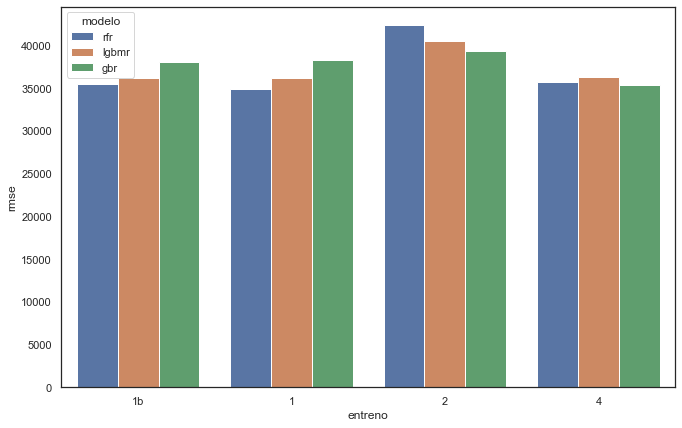

In [174]:
fig, ax = plt.subplots(figsize=(11,7))


sns.barplot(ax =ax, data=resumen1, x="entreno", y="rmse", hue="modelo")

plt.savefig(r'../img/books_read.png')

In [ ]:
plt.savefig('books_read.png')